In [152]:
import requests
import pandas as pd
from glassnode import GlassnodeClient
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix

In [10]:
gn = GlassnodeClient()
gn.set_api_key('b8f9b1f1-9755-42a5-b878-03433082cba3')

In [114]:
indicators = {
             'exchange_balance':'https://api.glassnode.com/v1/metrics/distribution/balance_exchanges',
             'sopr':'https://api.glassnode.com/v1/metrics/indicators/sopr',
             'rhodl_ratio':'https://api.glassnode.com/v1/metrics/indicators/rhodl_ratio'
}

In [115]:
def datamaker(indicators,start_date):
    df = pd.DataFrame(gn.get('https://api.glassnode.com/v1/metrics/market/price_usd',s=start_date))
    for element in indicators.keys():
        indicator = gn.get(indicators[element],s=start_date)
        df[element] = indicator
    return df

In [116]:
df = datamaker(indicators,'2016-01-01')

In [117]:
returns = df.pct_change()[1:]

In [118]:
returns

,market_price_usd,exchange_balance,sopr,rhodl_ratio
t,,,,
2016-01-02,0.000088,-0.002007,-0.002968,-0.043573
2016-01-03,-0.009019,0.015802,0.003722,0.020275
2016-01-04,0.006734,0.003314,0.000025,-0.044321
2016-01-05,-0.001695,-0.021409,-0.002221,0.034825
2016-01-06,-0.007483,0.003376,-0.000311,0.030605
...,...,...,...,...
2021-02-17,0.060236,-0.001108,0.013395,0.022649
2021-02-18,-0.009369,-0.000766,0.000767,0.028745
2021-02-19,0.079896,-0.000836,0.012617,0.076861


In [98]:
import sklearn

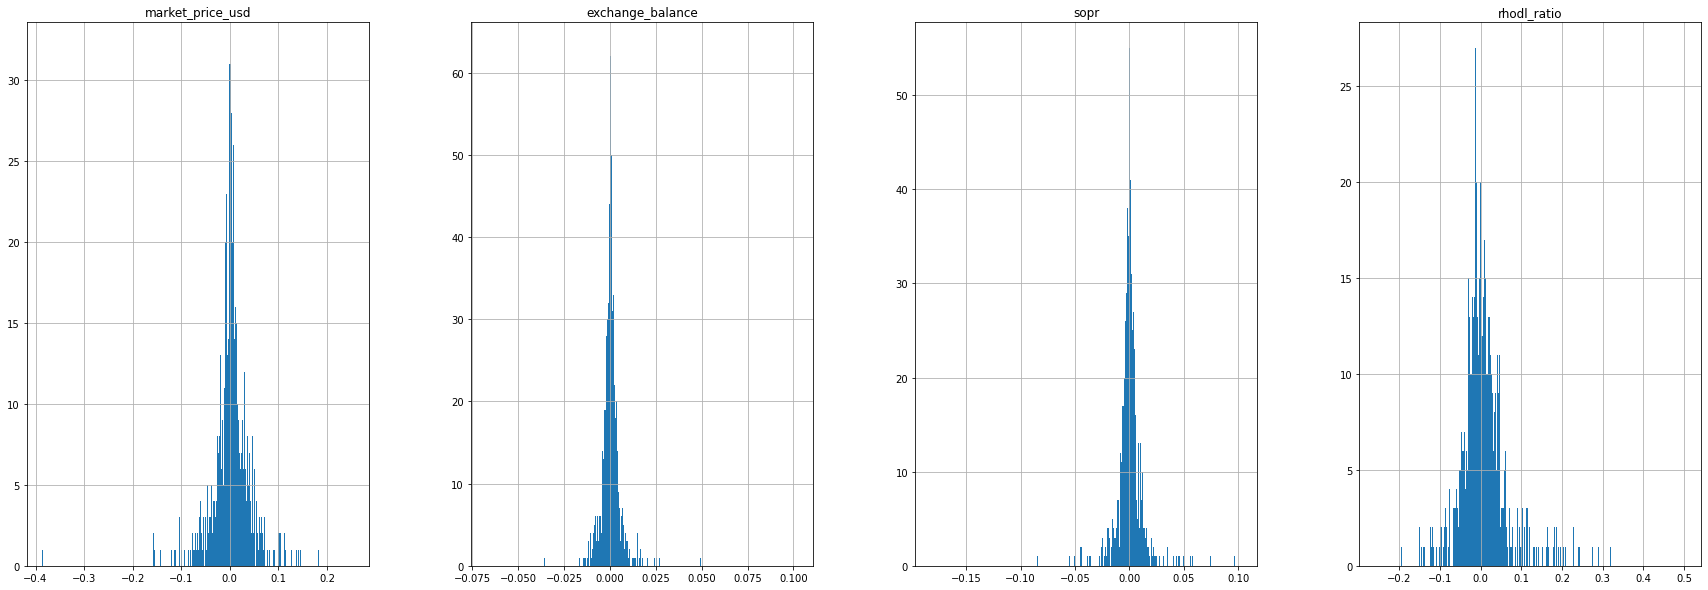

In [130]:
axes = returns.hist(figsize=(30,10), bins=1000, layout=(1,4))

In [366]:
returns[0:10]

,market_price_usd,exchange_balance,sopr,rhodl_ratio
t,,,,
2016-01-02,0.000088,-0.002007,-0.002968,-0.043573
2016-01-03,-0.009019,0.015802,0.003722,0.020275
2016-01-04,0.006734,0.003314,0.000025,-0.044321
2016-01-05,-0.001695,-0.021409,-0.002221,0.034825
2016-01-06,-0.007483,0.003376,-0.000311,0.030605
2016-01-07,0.066952,-0.008045,0.020239,0.065844
2016-01-08,-0.010152,0.004430,-0.012948,0.053718
2016-01-09,-0.009594,0.003268,-0.005547,0.046870
2016-01-10,-0.001653,-0.007768,0.011050,0.058648


In [363]:
df[0:10]

,market_price_usd,exchange_balance,sopr,rhodl_ratio
t,,,,
2016-01-01,434.883982,795500.778952,1.004530,336.693607
2016-01-02,434.922420,793904.337748,1.001549,322.022994
2016-01-03,430.999798,806449.424861,1.005276,328.552037
2016-01-04,433.901991,809122.245168,1.005301,313.990154
2016-01-05,433.166599,791799.468575,1.003069,324.924804
2016-01-06,429.925349,794472.367904,1.002757,334.869010
2016-01-07,458.709924,788080.536276,1.023051,356.917970
2016-01-08,454.053283,791571.621770,1.009805,376.090726
2016-01-09,449.697183,794158.727779,1.004203,393.718132


In [364]:
target = np.where(returns['market_price_usd'][:-1].values > 0, 1, 0)

In [365]:
target[0:10]

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [307]:
target.shape

(1874,)

In [308]:
returns = returns.iloc[:-1,:] # We have to remove the last value as we have no target for it

btc_train = returns[:int(returns.shape[0]*0.6)]
btc_train_target = target[:int(target.shape[0]*0.6)]

btc_val = returns[int(returns.shape[0]*0.6):int(returns.shape[0]*0.8)]
btc_val_target = target[int(target.shape[0]*0.6):int(target.shape[0]*0.8)]

btc_test =  returns[int(returns.shape[0]*0.8):]
btc_test_target = target[int(target.shape[0]*0.8):]

In [309]:
print(btc_train.shape, btc_train_target.shape,
      btc_val.shape, btc_val_target.shape,
      btc_test.shape, btc_test_target.shape)

(1124, 4) (1124,) (375, 4) (375,) (375, 4) (375,)


In [310]:
def subset_proportions(subset):
    props = {}
    for value in set(subset):
        data_value = [i for i in subset if i==value]
        props[value] = len(data_value) / len(subset)
    return props

   
compare_props = pd.DataFrame({
    "Overall": subset_proportions(target),
    "Train": subset_proportions(btc_train_target),
    "Validation": subset_proportions(btc_val_target),
    "Test" : subset_proportions(btc_test_target),
})

compare_props

,Overall,Train,Validation,Test
0,0.447172,0.437722,0.469333,0.453333
1,0.552828,0.562278,0.530667,0.546667


In [311]:

btc_train_val = returns[:int(returns.shape[0]*0.8)]
btc_train_val_target = target[:int(target.shape[0]*0.8)]

btc_train_val.shape, btc_train_val_target.shape

((1499, 4), (1499,))

In [312]:
close_series = pd.Series(btc_train_val['exchange_balance'])

return_series = pd.Series(btc_train_val["rhodl_ratio"].bfill()) # We temporarly backward fill the only NaN in the mom column as we need all the values for plotting

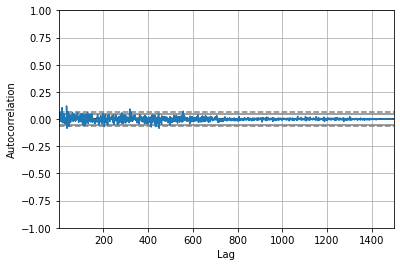

In [313]:
from pandas.plotting import autocorrelation_plot

ax = autocorrelation_plot(close_series)


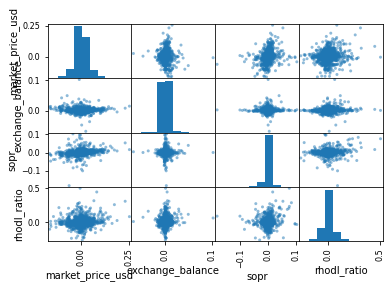

In [314]:
axes = scatter_matrix(btc_train_val)

In [315]:
def series_to_supervised(data, n_in, dropnan=True, with_names=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (n).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in - 1, -1, -1):
        cols.append(df.shift(i))
        if with_names:
            if i != 0:
                names += [f'{feature}(t-{i})' for feature in returns.columns]
            else:
                names += [f'{feature}(t)' for feature in returns.columns]

    # put it all together
    agg = pd.concat(cols, axis=1)
    if with_names:
        agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [316]:
n=30

In [317]:
btc_train_y = btc_train_target[n-1:]  # We drop the first n-1 targets as we do not have the data to predict them
btc_train_X = series_to_supervised(btc_train.values, n)

In [318]:
btc_train_X

,market_price_usd(t-29),exchange_balance(t-29),sopr(t-29),rhodl_ratio(t-29),market_price_usd(t-28),exchange_balance(t-28),sopr(t-28),rhodl_ratio(t-28),market_price_usd(t-27),exchange_balance(t-27),...,sopr(t-2),rhodl_ratio(t-2),market_price_usd(t-1),exchange_balance(t-1),sopr(t-1),rhodl_ratio(t-1),market_price_usd(t),exchange_balance(t),sopr(t),rhodl_ratio(t)
29,0.000088,-0.002007,-0.002968,-0.043573,-0.009019,0.015802,0.003722,0.020275,0.006734,0.003314,...,-0.000487,0.050033,-0.003411,0.002672,0.003859,-0.012754,-0.024905,-0.002303,-0.001650,-0.012380
30,-0.009019,0.015802,0.003722,0.020275,0.006734,0.003314,0.000025,-0.044321,-0.001695,-0.021409,...,0.003859,-0.012754,-0.024905,-0.002303,-0.001650,-0.012380,0.009294,0.017680,-0.004782,0.012519
31,0.006734,0.003314,0.000025,-0.044321,-0.001695,-0.021409,-0.002221,0.034825,-0.007483,0.003376,...,-0.001650,-0.012380,0.009294,0.017680,-0.004782,0.012519,0.004286,-0.013093,0.003869,-0.004179
32,-0.001695,-0.021409,-0.002221,0.034825,-0.007483,0.003376,-0.000311,0.030605,0.066952,-0.008045,...,-0.004782,0.012519,0.004286,-0.013093,0.003869,-0.004179,-0.011871,0.006836,-0.004178,-0.030911
33,-0.007483,0.003376,-0.000311,0.030605,0.066952,-0.008045,0.020239,0.065844,-0.010152,0.004430,...,0.003869,-0.004179,-0.011871,0.006836,-0.004178,-0.030911,0.053075,-0.010790,0.008207,-0.005236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,-0.050992,-0.000358,-0.004588,-0.032012,0.072970,0.000232,-0.015821,-0.034681,-0.025100,-0.001079,...,0.028198,-0.038141,0.005547,0.000264,0.004071,-0.040539,-0.000816,-0.000884,-0.002648,-0.029294
1120,0.072970,0.000232,-0.015821,-0.034681,-0.025100,-0.001079,0.000114,0.111918,0.010318,-0.000449,...,0.004071,-0.040539,-0.000816,-0.000884,-0.002648,-0.029294,-0.000088,-0.000601,-0.002620,-0.008393
1121,-0.025100,-0.001079,0.000114,0.111918,0.010318,-0.000449,0.008611,-0.084896,-0.032575,-0.001195,...,-0.002648,-0.029294,-0.000088,-0.000601,-0.002620,-0.008393,-0.004181,0.000366,-0.002200,-0.016360
1122,0.010318,-0.000449,0.008611,-0.084896,-0.032575,-0.001195,-0.007008,-0.043687,0.026638,-0.000527,...,-0.002620,-0.008393,-0.004181,0.000366,-0.002200,-0.016360,-0.031882,0.002246,-0.004129,0.016984


In [319]:
btc_train_X = btc_train_X.values
btc_train_X_3D = btc_train_X.reshape(-1, n, btc_train.shape[1])

btc_train_X_3D.shape, btc_train_y.shape

((1095, 30, 4), (1095,))

In [320]:
btc_train_val_y = btc_train_val_target[n-1:]
btc_train_val_X = series_to_supervised(btc_train_val.values, n)
btc_train_val_X = btc_train_val_X.values
btc_train_val_X_3D = btc_train_val_X.reshape(-1, n, btc_train_val.shape[1])

btc_train_val_X_3D.shape, btc_train_val_y.shape

((1470, 30, 4), (1470,))

In [321]:
btc_val_y = btc_val_target[n-1:]
btc_val_X = series_to_supervised(btc_val.values, n)
btc_val_X = btc_val_X.values
btc_val_X_3D = btc_val_X.reshape(-1, n, btc_val.shape[1])

btc_val_X_3D.shape, btc_val_y.shape

((346, 30, 4), (346,))

In [322]:
btc_test_y = btc_test_target[n-1:]
btc_test_X = series_to_supervised(btc_test.values, n)
btc_test_X = btc_test_X.values
btc_test_X_3D = btc_test_X.reshape(-1, n, btc_test.shape[1])

btc_test_X_3D.shape, btc_test_y.shape

((346, 30, 4), (346,))

In [323]:
X = btc_train


y = btc_train_target


(4,) (4, 4) (1124, 4)


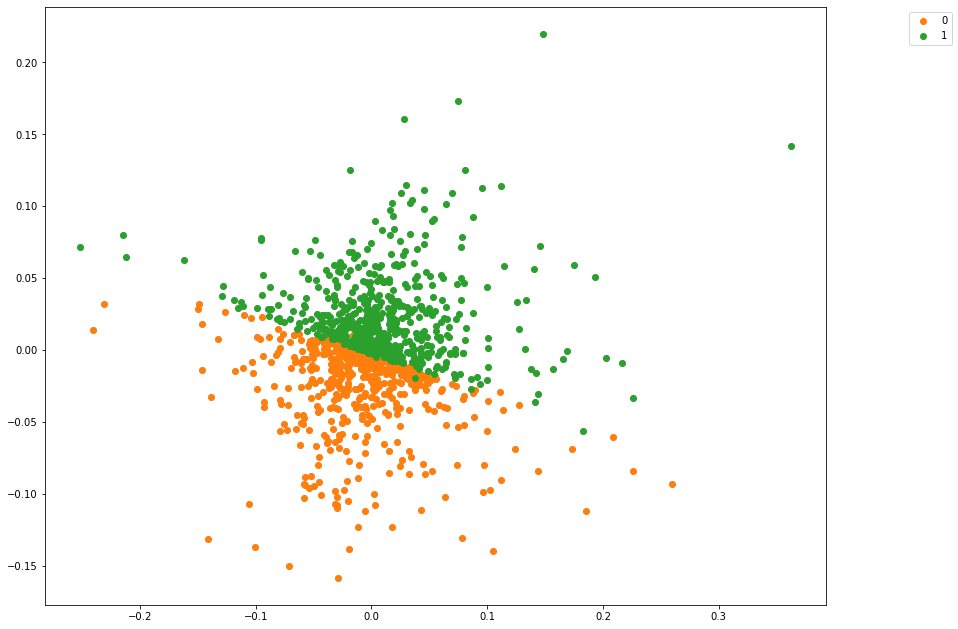

In [324]:
from sklearn import decomposition

pca = sklearn.decomposition.PCA()
pca_result = pca.fit_transform(X)

# Find the predictions from the PCA model, using just the first component
print(pca.mean_.shape, pca.components_.shape, pca_result.shape)

p1,p2 = pca_result[:,0], pca_result[:,1]

fig,ax = plt.subplots(figsize=(14,11))
ax.scatter(p1, p2, alpha=.2)

for lvl in set(btc_train_y):
    i = (y == lvl)
    plt.scatter(p1[i], p2[i], label=lvl)
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))

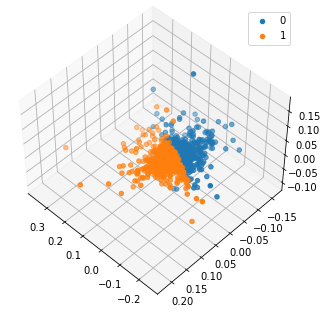

In [325]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

p1,p2, p3 = pca_result[:,0], pca_result[:,1], pca_result[:,2]

plt.cla()
for lvl in set(btc_train_y):
    i = (y == lvl)
    ax.scatter(p1[i], p2[i], p3[i], label=lvl)
    ax.legend()

In [326]:
from sklearn import manifold

tsne = sklearn.manifold.TSNE(n_components=2, verbose=1)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1124 samples in 0.001s...
[t-SNE] Computed neighbors for 1124 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1124
[t-SNE] Computed conditional probabilities for sample 1124 / 1124
[t-SNE] Mean sigma: 0.007879
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.210243
[t-SNE] KL divergence after 1000 iterations: 0.667154


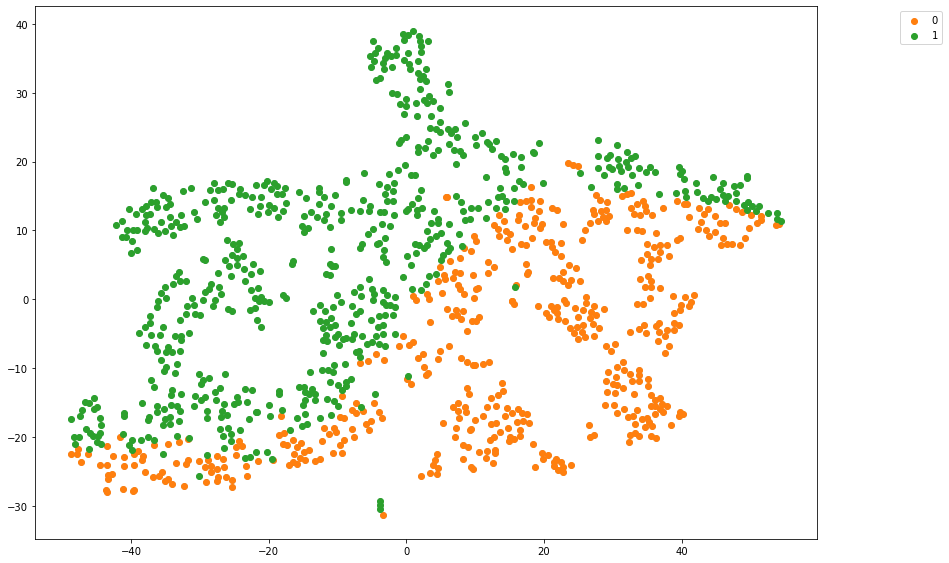

In [327]:
p1,p2 = tsne_results[:,0], tsne_results[:,1]

fig,ax = plt.subplots(figsize=(14,11))
ax.scatter(p1, p2, alpha=.2)
ax.set_aspect('equal')
for lvl in set(btc_train_y):
    i = (y == lvl)
    plt.scatter(p1[i], p2[i], label=lvl)
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))

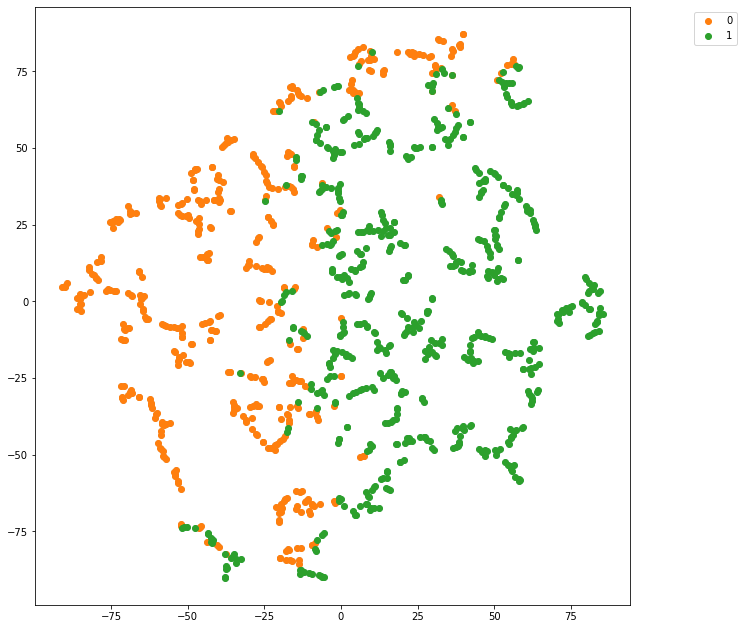

In [328]:
tsne = sklearn.manifold.TSNE(n_components=2, perplexity=5)
tsne_results = tsne.fit_transform(X)

p1,p2 = tsne_results[:,0], tsne_results[:,1]

fig,ax = plt.subplots(figsize=(14,11))
ax.scatter(p1, p2, alpha=.2)
ax.set_aspect('equal')
for lvl in set(btc_train_y):
    i = (y == lvl)
    plt.scatter(p1[i], p2[i], label=lvl)
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))

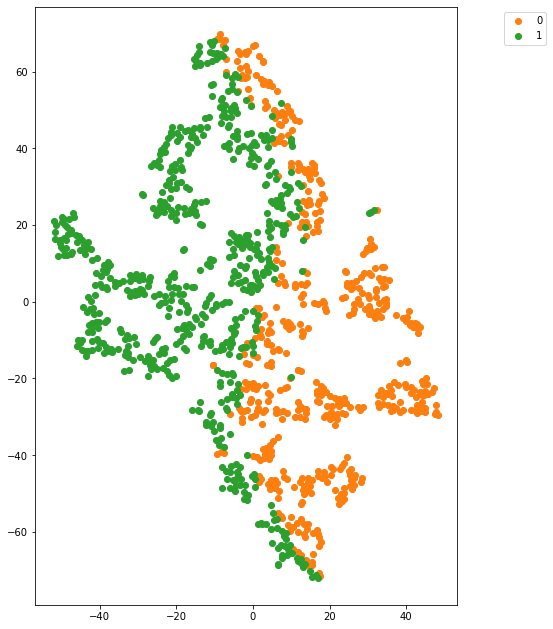

In [329]:
tsne = sklearn.manifold.TSNE(n_components=2, perplexity=20)
tsne_results = tsne.fit_transform(X)

p1,p2 = tsne_results[:,0], tsne_results[:,1]

fig,ax = plt.subplots(figsize=(14,11))
ax.scatter(p1, p2, alpha=.2)
ax.set_aspect('equal')
for lvl in set(btc_train_y):
    i = (y == lvl)
    plt.scatter(p1[i], p2[i], label=lvl)
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))

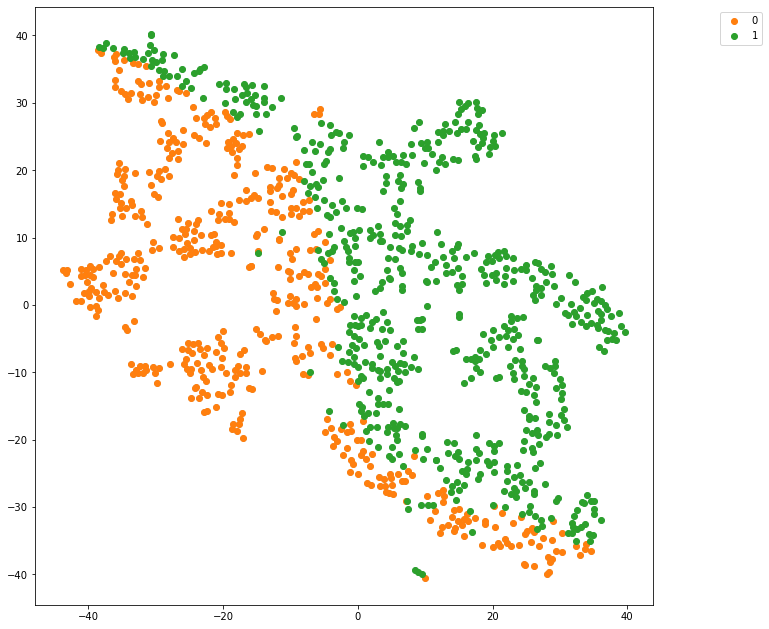

In [330]:
tsne = sklearn.manifold.TSNE(n_components=2, perplexity=30)
tsne_results = tsne.fit_transform(X)

p1,p2 = tsne_results[:,0], tsne_results[:,1]

fig,ax = plt.subplots(figsize=(14,11))
ax.scatter(p1, p2, alpha=.2)
ax.set_aspect('equal')
for lvl in set(btc_train_y):
    i = (y == lvl)
    plt.scatter(p1[i], p2[i], label=lvl)
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))

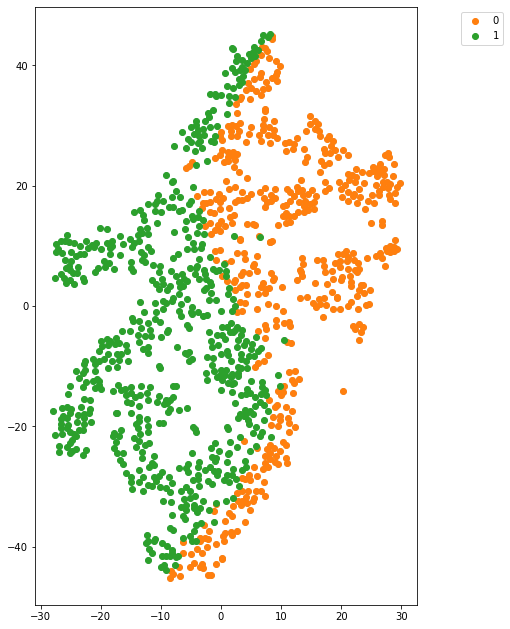

In [331]:

tsne = sklearn.manifold.TSNE(n_components=2, perplexity=40)
tsne_results = tsne.fit_transform(X)

p1,p2 = tsne_results[:,0], tsne_results[:,1]

fig,ax = plt.subplots(figsize=(14,11))
ax.scatter(p1, p2, alpha=.2)
ax.set_aspect('equal')
for lvl in set(btc_train_y):
    i = (y == lvl)
    plt.scatter(p1[i], p2[i], label=lvl)
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))

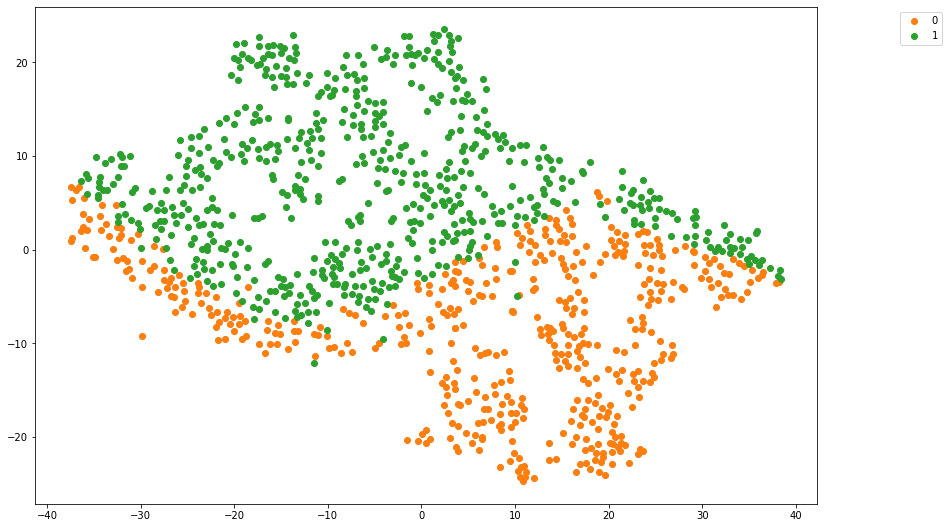

In [332]:
tsne = sklearn.manifold.TSNE(n_components=2, perplexity=50)
tsne_results = tsne.fit_transform(X)

p1,p2 = tsne_results[:,0], tsne_results[:,1]

fig,ax = plt.subplots(figsize=(14,11))
ax.scatter(p1, p2, alpha=.2)
ax.set_aspect('equal')
for lvl in set(btc_train_y):
    i = (y == lvl)
    plt.scatter(p1[i], p2[i], label=lvl)
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))

plt.show()

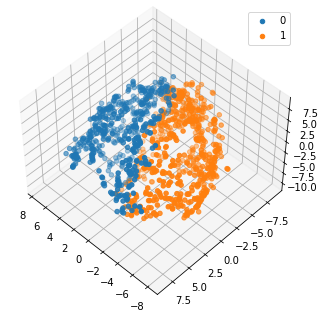

In [333]:
tsne = sklearn.manifold.TSNE(n_components=3, perplexity=30)
tsne_results = tsne.fit_transform(X)


fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

p1,p2,p3 = tsne_results[:,0], tsne_results[:,1], tsne_results[:,2]

plt.cla()
for lvl in set(btc_train_y):
    i = (y == lvl)
    ax.scatter(p1[i], p2[i], p3[i], label=lvl)
    ax.legend()

In [334]:
from sklearn.metrics import *

In [335]:
val_performance_acc = {}
val_performance_f1_weighted = {}

test_performance_acc = {}
test_performance_f1_weighted = {}

In [336]:

test_performance_acc_nyse = {}
test_performance_f1_weighted_nyse = {}

In [367]:
from sklearn.linear_model import SGDClassifier

log_reg = SGDClassifier(max_iter=400, tol=None, random_state=42,
                        loss="log", eta0=0.4, learning_rate="adaptive", penalty=None, n_jobs=-1)

log_reg.fit(btc_train_X, btc_train_y)

SGDClassifier(eta0=0.4, learning_rate='adaptive', loss='log', max_iter=400,
              n_jobs=-1, penalty=None, random_state=42, tol=None)

In [368]:
pred_train = log_reg.predict(btc_train_X)

confusion_matrix(btc_train_y, pred_train)

array([[427,  46],
       [  0, 622]])

In [369]:
from sklearn.model_selection import TimeSeriesSplit, cross_validate

tscv = TimeSeriesSplit()
ts_split = tscv.split(btc_train_val_X, btc_train_val_y)

for i, [train_index, test_index] in enumerate(ts_split):
    print(f"GROUP N°{i+1}: NUM OF SAMPLES IN THE SETS-> TRAIN: {len(train_index)}, TEST: {len(test_index)}")

GROUP N°1: NUM OF SAMPLES IN THE SETS-> TRAIN: 245, TEST: 245
GROUP N°2: NUM OF SAMPLES IN THE SETS-> TRAIN: 490, TEST: 245
GROUP N°3: NUM OF SAMPLES IN THE SETS-> TRAIN: 735, TEST: 245
GROUP N°4: NUM OF SAMPLES IN THE SETS-> TRAIN: 980, TEST: 245
GROUP N°5: NUM OF SAMPLES IN THE SETS-> TRAIN: 1225, TEST: 245


In [370]:
metrics = ["accuracy","precision_weighted","recall_weighted","f1_weighted"]

In [371]:
cross_val_result = cross_validate(log_reg, btc_train_val_X, btc_train_val_y, cv=tscv.split(btc_train_val_X, btc_train_val_y), scoring=metrics, n_jobs=-1)

In [372]:

for i in cross_val_result:
    cross_val_result[i] = cross_val_result[i].mean()
cross_val_result

{'fit_time': 0.11426014900207519,
 'score_time': 0.0024706363677978516,
 'test_accuracy': 0.8946938775510203,
 'test_precision_weighted': 0.8954118725786969,
 'test_recall_weighted': 0.8946938775510203,
 'test_f1_weighted': 0.8943668629512892}

In [373]:
pred_val = log_reg.predict(btc_val_X)

In [344]:
print(classification_report(btc_val_y, pred_val, digits=4))

              precision    recall  f1-score   support

           0     0.9856    0.8354    0.9043       164
           1     0.8696    0.9890    0.9254       182

    accuracy                         0.9162       346
   macro avg     0.9276    0.9122    0.9149       346
weighted avg     0.9246    0.9162    0.9154       346



In [345]:
confusion_matrix(btc_val_y, pred_val)

array([[137,  27],
       [  2, 180]])

In [346]:
pred_val_scores = log_reg.decision_function(btc_val_X)

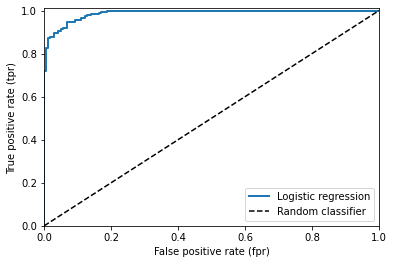

In [347]:
fpr_log_reg, tpr_log_reg, thresholds = roc_curve(btc_val_y, pred_val_scores)

def plot_roc_curve(fpr, tpr, labels=None):
    for fpr_i, tpr_i, label_i in zip(fpr, tpr, labels):
        plt.plot(fpr_i, tpr_i, linewidth=2, label=label_i)
    plt.plot([0, 1], [0, 1], "k--", label="Random classifier")
    plt.axis([0, 1, 0, 1.01])
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.legend(loc="lower right")
    
plot_roc_curve([fpr_log_reg], [tpr_log_reg], labels=["Logistic regression"])

In [348]:
roc_auc_score(btc_val_y, pred_val_scores)

0.9880393996247655

In [377]:
val_performance_acc['Log Reg'] = accuracy_score(btc_val_y, pred_val)
val_performance_f1_weighted['Log Reg'] = f1_score(btc_val_y, pred_val, average='weighted')

pred_test =  log_reg.predict(btc_test_X)

test_performance_acc['Log Reg'] = accuracy_score(btc_test_y, pred_test)
test_performance_f1_weighted['Log Reg'] = f1_score(btc_test_y, pred_test, average='weighted')


In [378]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB


gnb_clf = GaussianNB()
log_clf = SGDClassifier(max_iter=400, tol=None, random_state=42,
                        loss="log", eta0=0.4, learning_rate="adaptive", penalty=None, n_jobs=-1)
perc_clf = SGDClassifier(max_iter=400, tol=None, random_state=42,
                   loss="perceptron", eta0=1, learning_rate="constant", penalty=None, n_jobs=-1)
svm_clf = SVC(random_state=42, probability=True)

voting_clf = VotingClassifier(
    estimators=[('gnb', gnb_clf), ('log', log_clf), ('perc', perc_clf), ('svm',svm_clf)],
    voting='hard')

In [379]:
for clf in (gnb_clf, log_clf, perc_clf, svm_clf, voting_clf):
    clf.fit(btc_train_X, btc_train_y)
    pred_val = clf.predict(btc_val_X)
    print(clf.__class__.__name__, '\n', classification_report(btc_val_y, pred_val, digits=3))

GaussianNB 
               precision    recall  f1-score   support

           0      0.522     0.884     0.656       164
           1      0.721     0.269     0.392       182

    accuracy                          0.561       346
   macro avg      0.621     0.577     0.524       346
weighted avg      0.626     0.561     0.517       346

SGDClassifier 
               precision    recall  f1-score   support

           0      0.986     0.835     0.904       164
           1      0.870     0.989     0.925       182

    accuracy                          0.916       346
   macro avg      0.928     0.912     0.915       346
weighted avg      0.925     0.916     0.915       346

SGDClassifier 
               precision    recall  f1-score   support

           0      0.951     0.945     0.948       164
           1      0.951     0.956     0.953       182

    accuracy                          0.951       346
   macro avg      0.951     0.951     0.951       346
weighted avg      0.951     0

In [380]:
pred_train = perc_clf.predict(btc_train_X)

confusion_matrix(btc_train_y, pred_train)

array([[473,   0],
       [  0, 622]])

In [381]:

cross_val_result = cross_validate(voting_clf, btc_train_val_X, btc_train_val_y, cv=tscv.split(btc_train_val_X, btc_train_val_y), scoring=metrics, n_jobs=-1)

In [382]:
for i in cross_val_result:
    cross_val_result[i] = cross_val_result[i].mean()
cross_val_result

{'fit_time': 0.5907389163970947,
 'score_time': 0.02371225357055664,
 'test_accuracy': 0.8751020408163266,
 'test_precision_weighted': 0.8795625187242923,
 'test_recall_weighted': 0.8751020408163266,
 'test_f1_weighted': 0.875420863529976}

In [383]:
pred_val = voting_clf.predict(btc_val_X)

In [384]:
print(classification_report(btc_val_y, pred_val, digits=4))

              precision    recall  f1-score   support

           0     0.8361    0.9329    0.8818       164
           1     0.9325    0.8352    0.8812       182

    accuracy                         0.8815       346
   macro avg     0.8843    0.8840    0.8815       346
weighted avg     0.8868    0.8815    0.8815       346



In [385]:
confusion_matrix(btc_val_y, pred_val)

array([[153,  11],
       [ 30, 152]])

In [386]:
val_performance_acc['Voting Clf'] = accuracy_score(btc_val_y, pred_val)
val_performance_f1_weighted['Voting Clf'] = f1_score(btc_val_y, pred_val, average='weighted')

pred_test =  perc_clf.predict(btc_test_X)

test_performance_acc['Voting Clf'] = accuracy_score(btc_test_y, pred_test)
test_performance_f1_weighted['Voting Clf'] = f1_score(btc_test_y, pred_test, average='weighted')